<a href="https://colab.research.google.com/github/Chanyoungkim1024/ML_2021/blob/ML_2021/%EC%BD%94%EB%A1%9C%EB%82%98%EC%8B%9C%EA%B0%81%ED%99%94%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/

/content/drive


In [ ]:
cd "MyDrive"

/content/drive/MyDrive


In [ ]:
cd "covid_data"

/content/drive/MyDrive/covid_data


In [ ]:
%pwd

'/content/drive/My Drive/covid_data'

In [ ]:
#matplotlib inline
# 가설 1. 코로나 발생 이후로 연령별 cgi 평균수치가 가장높은 품목이 달라졌을 것이다.

In [ ]:
delivery = pd.read_csv("./delivery.csv")
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


In [ ]:
time = pd.read_csv("./COVID_19/Time.csv")
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [ ]:
index = pd.read_csv("./index.csv")
index.head()

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595


In [ ]:
# date별 코로나 확진자 수

Text(0.5, 1.0, 'Confirmed by date')

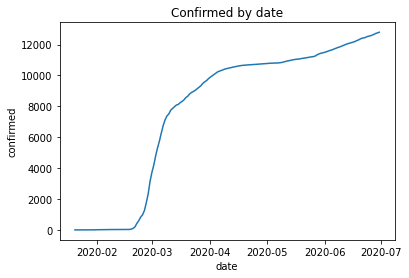

In [ ]:
time.date = pd.to_datetime(time.date)
sns.lineplot(x="date", y="confirmed", data = time)
plt.title("Confirmed by date")

In [ ]:
# 코로나 이전(2019년) 연령대별 cgi 평균 수치가 가장 높은 품목

In [ ]:
#2019년의 데이터만 뽑기 위해 마지막 달인 12월까지 몇행인지 도출
np.where(index.period == 201912)

(array([82608, 82609, 82610, ..., 90125, 90126, 90127]),)

In [ ]:
#다시, year이라는 컬럼을 추가해 년만 표시되게 하기

In [ ]:
period_list = index.period.astype(str).tolist()

In [ ]:
year_list = []
for i in period_list:
    year_list.append(i[0:4])

In [ ]:
index["year"] = year_list
index

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [ ]:
#코로나 이전(2019년) 데이터만 뽑기 위해 조건 설정

In [ ]:
last_year = index[index["year"] == '2019']
last_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
90123,201912,화장품,화장품,all,all,서울,all,72.688013,2019
90124,201912,화장품,화장품,all,all,서울,강동구,111.745516,2019
90125,201912,화장품,화장품,all,all,서울,서대문구,24.279394,2019
90126,201912,화장품,화장품,all,all,서울,서초구,25.715134,2019


In [ ]:
#코로나 이후(2020년) 데이터

In [ ]:
now_year = index[index["year"] == '2020']
now_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
90128,202001,건강/의료용품,건강관리용품,20,F,서울,all,101.080460,2020
90129,202001,건강/의료용품,건강관리용품,20,F,서울,강동구,142.598266,2020
90130,202001,건강/의료용품,건강관리용품,20,F,서울,광진구,92.484593,2020
90131,202001,건강/의료용품,건강관리용품,20,F,서울,구로구,162.756403,2020
90132,202001,건강/의료용품,건강관리용품,20,F,서울,양천구,77.568793,2020
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [ ]:
# 2019년의 연령대별 품목별 cgi의 평균값

In [ ]:
last_mean = last_year.groupby(['year', 'age', 'catl'])['cgi'].mean()
last_mean

year  age  catl   
2019  20   건강/의료용품    129.885245
           식품         118.586497
           일용품        125.029549
           화장품        120.923962
      30   건강/의료용품     95.776843
           식품         101.027994
           일용품         99.908279
           화장품         93.591992
      40   건강/의료용품    104.186269
           식품          99.451845
           일용품         96.973864
           화장품         88.120565
      50   건강/의료용품    104.197599
           식품         101.345769
           일용품         92.956185
           화장품         86.100039
      60   건강/의료용품    113.988335
           식품         102.282403
           일용품        100.047142
           화장품         92.799079
      all  건강/의료용품    103.287897
           식품         101.287899
           일용품         95.536417
           화장품         87.280067
Name: cgi, dtype: float64

In [ ]:
#2020년의 연령대별 품목별 cgi의 평균값

In [ ]:
now_mean = now_year.groupby(['year', 'age', 'catl'])['cgi'].mean()
now_mean

year  age  catl   
2020  20   건강/의료용품    125.643626
           식품         112.201102
           일용품        104.349345
           화장품         94.520504
      30   건강/의료용품     85.074590
           식품          87.849004
           일용품         70.823055
           화장품         87.529506
      40   건강/의료용품     91.254463
           식품          88.175043
           일용품         79.965584
           화장품         65.652442
      50   건강/의료용품     95.223442
           식품          91.623447
           일용품         76.642391
           화장품         70.240234
      60   건강/의료용품     93.147133
           식품          91.330089
           일용품         86.947310
           화장품         79.629638
      all  건강/의료용품     91.544952
           식품          89.828966
           일용품         78.400660
           화장품         72.365893
Name: cgi, dtype: float64

In [ ]:
#2019년의 연령대별 품목별 cgi평균의 시각화

In [ ]:
last_meann = pd.read_csv
last_mean.loc[]

In [ ]:
2020년의 연령대별 품목별 cgi의 시각화